In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%%time
df = pd.read_parquet("df_lemma.pq")
#df = pd.read_csv("samp.csv")

In [4]:
df.head()

,Unnamed: 0,author,date,domain,title,content,datatype,companies,locations,sdgs,clean_content,content_lower,content_tokenized,no_stopwords,content_stemmed,content_lemmatized
0,389108,None,2020-01-02,digitaljournal,Looking into the truth about modern workplace ...,"['Hi, what are you looking for?', 'By', 'Publi...",general,[],['UnitedKingdomofGreatBritainandNorthernIreland'],"['PeaceJusticeAndStrongInstitutions', 'Climate...",Hi what are you looking for By Published Workp...,hi what are you looking for by published workp...,"[hi, what, are, you, looking, for, by, publish...","[hi, looking, published, workplaces, transform...","[hi, look, publish, workplac, transform, accor...","[hi, looking, published, workplace, transforme..."
1,119150,None,2020-01-02,bnnbloomberg,Hexo refiles financial statements,"['New York reported a record 90,132 new Covid-...",general,[],[],['ReduceInequalities'],New York reported a record 90132 new Covid19 c...,new york reported a record 90132 new covid19 c...,"[new, york, reported, a, record, 90132, new, c...","[new, york, reported, record, 90132, new, covi...","[new, york, report, record, 90132, new, covid1...","[new, york, reported, record, 90132, new, covi..."
2,389111,None,2020-01-02,digitaljournal,"Japan raid, Turkey arrests in widening Ghosn p...","['Hi, what are you looking for?', 'By', 'Publi...",general,[],"['Lebanon', 'RussianFederation', 'Japan', 'Tur...","['PeaceJusticeAndStrongInstitutions', 'GoodHea...",Hi what are you looking for By Published Offic...,hi what are you looking for by published offic...,"[hi, what, are, you, looking, for, by, publish...","[hi, looking, published, officials, thursday, ...","[hi, look, publish, offici, thursday, raid, to...","[hi, looking, published, official, thursday, r..."
3,389110,None,2020-01-02,digitaljournal,Pope's bodyguards criticised over slapping inc...,"['Hi, what are you looking for?', 'By', 'Publi...",general,['TwitterInc'],['Italy'],[],Hi what are you looking for By Published Pope ...,hi what are you looking for by published pope ...,"[hi, what, are, you, looking, for, by, publish...","[hi, looking, published, pope, franciss, attem...","[hi, look, publish, pope, franciss, attempt, w...","[hi, looking, published, pope, franciss, attem..."
4,389113,None,2020-01-02,digitaljournal,Lebanon denies president welcomed fugitive Ghosn,"['Hi, what are you looking for?', 'By', 'Publi...",general,[],"['China', 'Lebanon', 'Ukraine', 'Japan']",['PeaceJusticeAndStrongInstitutions'],Hi what are you looking for By Published The L...,hi what are you looking for by published the l...,"[hi, what, are, you, looking, for, by, publish...","[hi, looking, published, lebanese, presidency,...","[hi, look, publish, lebanes, presid, thursday,...","[hi, looking, published, lebanese, presidency,..."


In [4]:
df_samp = df.loc[:,["title", "date"]].sample(100000).copy()

In [5]:
df_samp = df.loc[:,["title", "date"]].copy()

In [6]:
#df_samp.to_csv("samp.csv",index=False)

In [7]:
df_samp.head()

,title,date
0,Looking into the truth about modern workplace ...,2020-01-02
1,Hexo refiles financial statements,2020-01-02
2,"Japan raid, Turkey arrests in widening Ghosn p...",2020-01-02
3,Pope's bodyguards criticised over slapping inc...,2020-01-02
4,Lebanon denies president welcomed fugitive Ghosn,2020-01-02


In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")

model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

/opt/conda/envs/nvtabular_dev_11.2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
tokenizer.tokenize("I like this movie very much")

['I', 'like', 'this', 'movie', 'very', 'much']

In [2]:
tokenizer("I like this movie")

{'input_ids': [101, 146, 1176, 1142, 2523, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

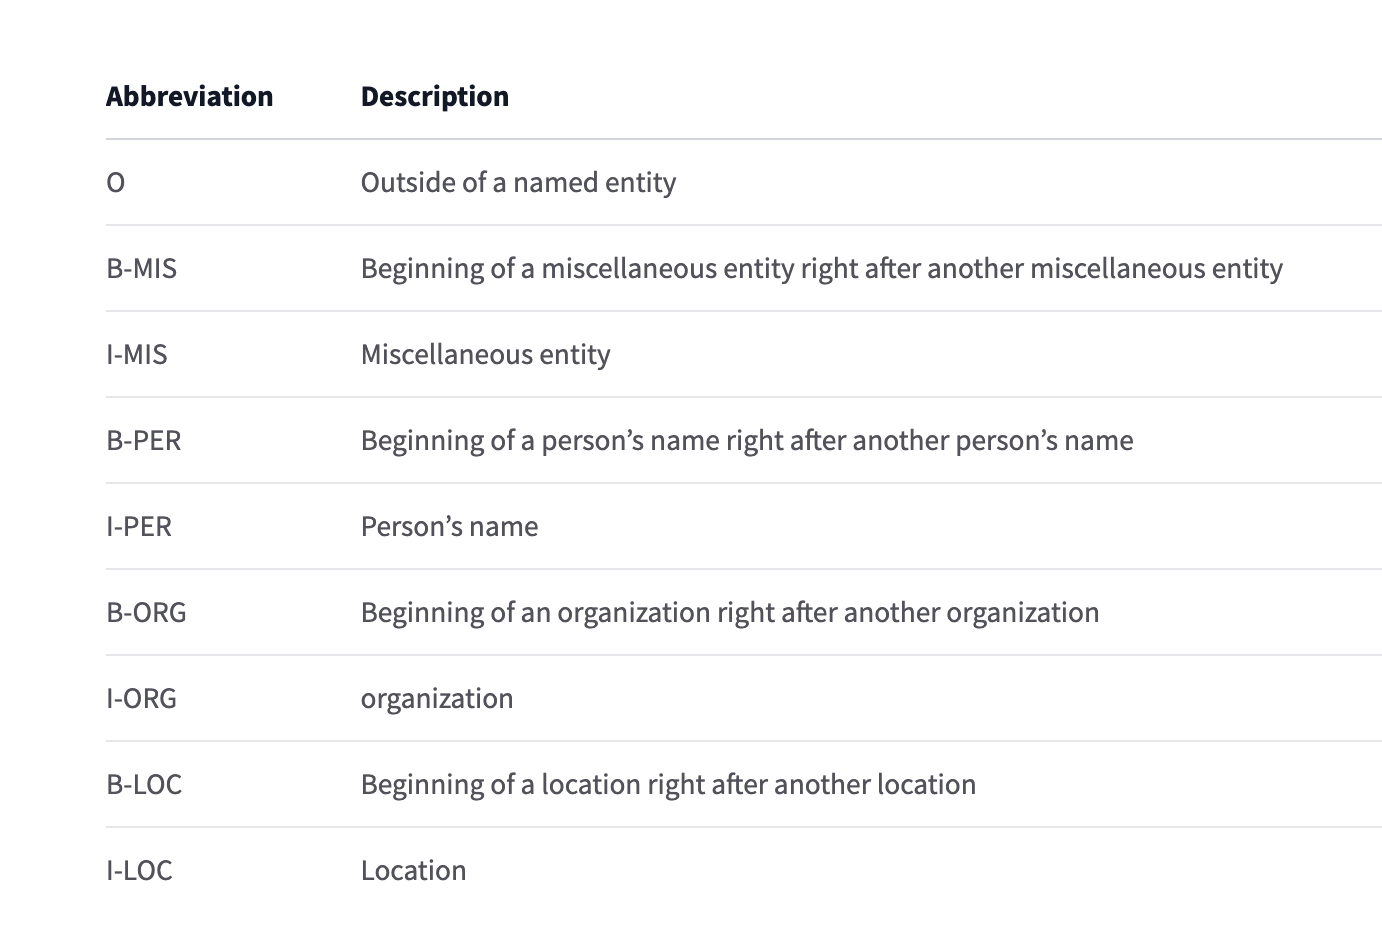

In [9]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

In [10]:
%%time
ner_results = nlp(example)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]
CPU times: user 312 ms, sys: 12.1 ms, total: 324 ms
Wall time: 529 ms


In [11]:
# %%time
# res = nlp(list(df_samp["title"].values))

In [ ]:
# %%time
# df_samp["ner"] = df_samp["title"].apply(nlp)

In [12]:
df_samp

,title,date
0,Looking into the truth about modern workplace ...,2020-01-02
1,Hexo refiles financial statements,2020-01-02
2,"Japan raid, Turkey arrests in widening Ghosn p...",2020-01-02
3,Pope's bodyguards criticised over slapping inc...,2020-01-02
4,Lebanon denies president welcomed fugitive Ghosn,2020-01-02
...,...,...
477546,Improved models of care for cancer survivors,2022-04-16
477547,Cracks in the foundation: how COVID-19 showed ...,2022-04-16
477548,"Bragar Eagel & Squire, P.C.",2022-04-18
477549,TP Minds Americas returns to the LIVE stage th...,2022-04-18


In [53]:
df_samp.iloc[0,-1]

'2020-11-23'

In [54]:
1

1

In [9]:
# !pip3 install datasets

In [10]:
df_samp.head()

,title,date
48552,Both naive and memory B cells respond to flu v...,2020-09-16
31476,Executive order Trump claimed would prevent ev...,2020-08-13
56309,Thai Union surges as tuna and toilet paper top...,2020-03-20
32244,What Will Oil Prices Do After The Coronavirus?,2020-02-16
46960,Indonesian students balance on tree branches t...,2020-09-07


In [13]:
df_samp.rename(columns={"title":"input"}, inplace=True)

In [14]:
from datasets import Dataset,DatasetDict

ds = Dataset.from_pandas(df_samp)

In [15]:
ds

Dataset({
    features: ['input', 'date'],
    num_rows: 477551
})

In [16]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

In [17]:
def tok_func(x): return tokenizer(x["input"])

In [18]:
tok_ds = ds.map(tok_func, batched=True)

Parameter 'function'=<function tok_func at 0x7f0f38d49af0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
100%|██████████| 478/478 [00:14<00:00, 33.89ba/s]


In [19]:
row = tok_ds[0]
row['input'], row['input_ids']

('Looking into the truth about modern workplace environments',
 [101, 8540, 1154, 1103, 3062, 1164, 2030, 19328, 10152, 102])

In [20]:
len(tokenizer)

28996

In [21]:
# !pip3 install transformers -U

In [22]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [23]:
from transformers import TrainingArguments,Trainer

In [24]:
bs = 128
epochs = 4
lr = 8e-5

In [25]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

In [29]:
trainer = Trainer(model, args,
                  tokenizer=tokenizer)

Using cuda_amp half precision backend


In [26]:
eval_ds = Dataset.from_pandas(df_samp).map(tok_func, batched=True)

100%|██████████| 478/478 [00:13<00:00, 34.46ba/s]


In [33]:
res  = trainer.predict(eval_ds)

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: date, input, __index_level_0__. If date, input, __index_level_0__ are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 100000
  Batch size = 256


In [34]:
res

PredictionOutput(predictions=array([[[   9.67  ,   -0.1692,   -1.094 , ...,   -1.865 ,   -1.746 ,
           -1.537 ],
        [  10.875 ,   -0.514 ,   -1.656 , ...,   -2.062 ,   -1.493 ,
           -1.921 ],
        [  11.09  ,   -0.3015,   -1.446 , ...,   -1.525 ,   -1.923 ,
           -1.745 ],
        ...,
        [-100.    , -100.    , -100.    , ..., -100.    , -100.    ,
         -100.    ],
        [-100.    , -100.    , -100.    , ..., -100.    , -100.    ,
         -100.    ],
        [-100.    , -100.    , -100.    , ..., -100.    , -100.    ,
         -100.    ]],

       [[  10.28  ,   -0.833 ,   -1.173 , ...,   -1.608 ,   -1.949 ,
           -1.32  ],
        [   9.67  ,   -0.8984,   -2.64  , ...,   -1.891 ,   -1.    ,
           -2.01  ],
        [  10.89  ,   -1.472 ,   -1.42  , ...,   -0.8535,   -2.133 ,
           -1.55  ],
        ...,
        [-100.    , -100.    , -100.    , ..., -100.    , -100.    ,
         -100.    ],
        [-100.    , -100.    , -100.    , .

In [70]:
# pipeline??

In [27]:
eval_ds

Dataset({
    features: ['input', 'date', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 477551
})

In [28]:
from transformers.pipelines.pt_utils import KeyDataset

In [50]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, device=0, aggregation_strategy="simple")

In [51]:
outputs = []

In [52]:
%%time
for out in nlp(KeyDataset(eval_ds, "input"), batch_size=512):
    outputs.append(out)

CPU times: user 12min 35s, sys: 925 ms, total: 12min 36s
Wall time: 11min 29s


In [53]:
len(outputs)

477551

In [54]:
outputs[1]

[{'entity_group': 'ORG',
  'score': 0.98141575,
  'word': 'Hexo',
  'start': 0,
  'end': 4}]

In [55]:
outputs[:10]

[[],
 [{'entity_group': 'ORG',
   'score': 0.98141575,
   'word': 'Hexo',
   'start': 0,
   'end': 4}],
 [{'entity_group': 'LOC',
   'score': 0.9998456,
   'word': 'Japan',
   'start': 0,
   'end': 5},
  {'entity_group': 'LOC',
   'score': 0.9998367,
   'word': 'Turkey',
   'start': 12,
   'end': 18},
  {'entity_group': 'MISC',
   'score': 0.4966304,
   'word': 'G',
   'start': 39,
   'end': 40},
  {'entity_group': 'PER',
   'score': 0.36327088,
   'word': '##hos',
   'start': 40,
   'end': 43}],
 [{'entity_group': 'PER',
   'score': 0.9622895,
   'word': 'Pope',
   'start': 0,
   'end': 4}],
 [{'entity_group': 'LOC',
   'score': 0.9998055,
   'word': 'Lebanon',
   'start': 0,
   'end': 7},
  {'entity_group': 'PER',
   'score': 0.9996407,
   'word': 'G',
   'start': 43,
   'end': 44},
  {'entity_group': 'PER',
   'score': 0.7288272,
   'word': '##hos',
   'start': 44,
   'end': 47}],
 [{'entity_group': 'MISC',
   'score': 0.99968207,
   'word': 'Lebanese',
   'start': 0,
   'end': 8},


In [56]:
df_samp.iloc[1,0]

'Hexo refiles financial statements'

In [57]:
df_samp["ner"] = outputs

In [58]:
df_samp.head()

,input,date,ner
0,Looking into the truth about modern workplace ...,2020-01-02,[]
1,Hexo refiles financial statements,2020-01-02,"[{'entity_group': 'ORG', 'score': 0.98141575, ..."
2,"Japan raid, Turkey arrests in widening Ghosn p...",2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998456, '..."
3,Pope's bodyguards criticised over slapping inc...,2020-01-02,"[{'entity_group': 'PER', 'score': 0.9622895, '..."
4,Lebanon denies president welcomed fugitive Ghosn,2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998055, '..."


In [59]:
df_samp.to_parquet("df_ner.pq")

In [46]:
# !pip3 install spacy

In [47]:
import spacy
from spacy import displacy

In [60]:
def hf_ann(text, ner_results):
 

    color_code = {"ORG": "#8ef", "MISC": "#faa", "PER": "#fea", "LOC": "#afa"}
    annotated_tuple = []

    annotated_tuple.append(text[: ner_results[0]["start"]])
    # annotated_tuple.append(ner_results[0])
    annotated_tuple.append(
        tuple(
            [
                text[ner_results[0]["start"] : ner_results[0]["end"]],
                ner_results[0]["entity_group"],
                color_code[ner_results[0]["entity_group"]],
            ]
        )
    )
    for i in range(1, len(ner_results)):
        prev = ner_results[i - 1]
        current = ner_results[i]
        annotated_tuple.append(text[prev["end"] : current["start"]])
        annotated_tuple.append(
            tuple(
                [
                    text[current["start"] : current["end"]],
                    current["entity_group"],
                    color_code[current["entity_group"]],
                ]
            )
        )

    annotated_tuple.append(text[ner_results[-1]["end"] :])
    return tuple(annotated_tuple)

In [71]:
#displacy.render(hf_ann(df_samp.iloc[2,0],df_samp.iloc[2,-1]), style="ent", jupyter=True, manual=True)

In [67]:
hf_ann(df_samp.iloc[2,0],df_samp.iloc[2,-1])

('',
 ('Japan', 'LOC', '#afa'),
 ' raid, ',
 ('Turkey', 'LOC', '#afa'),
 ' arrests in widening ',
 ('G', 'MISC', '#faa'),
 '',
 ('hos', 'PER', '#fea'),
 'n probe')

In [65]:
df_samp

,input,date,ner
0,Looking into the truth about modern workplace ...,2020-01-02,[]
1,Hexo refiles financial statements,2020-01-02,"[{'entity_group': 'ORG', 'score': 0.98141575, ..."
2,"Japan raid, Turkey arrests in widening Ghosn p...",2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998456, '..."
3,Pope's bodyguards criticised over slapping inc...,2020-01-02,"[{'entity_group': 'PER', 'score': 0.9622895, '..."
4,Lebanon denies president welcomed fugitive Ghosn,2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998055, '..."
...,...,...,...
477546,Improved models of care for cancer survivors,2022-04-16,[]
477547,Cracks in the foundation: how COVID-19 showed ...,2022-04-16,"[{'entity_group': 'MISC', 'score': 0.98701143,..."
477548,"Bragar Eagel & Squire, P.C.",2022-04-18,"[{'entity_group': 'ORG', 'score': 0.98975074, ..."
477549,TP Minds Americas returns to the LIVE stage th...,2022-04-18,"[{'entity_group': 'ORG', 'score': 0.994438, 'w..."


In [70]:
df_samp.to_csv("ner_res.csv")

# Sentiment Analysis

In [109]:
df_samp["input"] = df_samp["input"].apply(lambda x: x[:500])

In [110]:
df_samp.iloc[10,0]

'US places ban on Cuban defense chief'

In [111]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [112]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [113]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0)

In [114]:
def tok_func(x): return tokenizer(x["input"])

In [115]:
eval_ds = Dataset.from_pandas(df_samp).map(tok_func, batched=True)

100%|██████████| 478/478 [00:48<00:00,  9.80ba/s]


In [116]:
%%time
outputs = []
for out in sentiment_task(KeyDataset(eval_ds, "input"), batch_size=1024):
    outputs.append(out)

CPU times: user 4min 43s, sys: 178 ms, total: 4min 43s
Wall time: 4min 19s


In [117]:
len(outputs)

477551

In [118]:
df_samp["sentiment"] = outputs

In [120]:
df_samp.head()

,input,date,ner,sentiment
0,Looking into the truth about modern workplace ...,2020-01-02,[],"{'label': 'POSITIVE', 'score': 0.9962049126625..."
1,Hexo refiles financial statements,2020-01-02,"[{'entity_group': 'ORG', 'score': 0.98141575, ...","{'label': 'NEGATIVE', 'score': 0.9962484240531..."
2,"Japan raid, Turkey arrests in widening Ghosn p...",2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998456, '...","{'label': 'NEGATIVE', 'score': 0.9676036834716..."
3,Pope's bodyguards criticised over slapping inc...,2020-01-02,"[{'entity_group': 'PER', 'score': 0.9622895, '...","{'label': 'NEGATIVE', 'score': 0.9878612160682..."
4,Lebanon denies president welcomed fugitive Ghosn,2020-01-02,"[{'entity_group': 'LOC', 'score': 0.9998055, '...","{'label': 'NEGATIVE', 'score': 0.8703671097755..."


In [119]:
df_samp.to_csv("ner_sentiment.csv")

In [100]:
df_samp.iloc[306177]

input    New China pandemic outbreak China single-bigge...
date                                            2021-01-14
ner      [{'entity_group': 'LOC', 'score': 0.99948597, ...
Name: 306177, dtype: object

In [103]:
for i in range(306177, 306177+512):
    try:
        sentiment_task(df_samp.iloc[i,0])
    except:
        print(i)

/opt/conda/envs/nvtabular_dev_11.2/lib/python3.8/site-packages/transformers/pipelines/base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


306481


In [105]:
df_samp.iloc[306481,0]

"Biden's plan to vaccinate the country includes opening up eligibility to get more people vaccinated, creating more vaccination sites, increasing supply and distribution of the vaccines, mobilizing more personnel to support the vaccination effort, and launching a public education campaign to address those hesitant to take the vaccine. `` The process of establishing priority groups was driven by science, but the implementation has been too rigid and confusing. We now see doses of vaccines sitting in freezers unused while people who want the vaccine can not get it, '' a fact sheet provided by the Biden transition team reads. The fact sheet continues, `` President-elect Biden's plan encourages states to open up eligibility beyond healthcare workers and long-term care facility residents and staff, to include frontline essential workers like teachers, first responders, grocery store employees, and anyone who is 65 and older. `` Health care workers and residents of long-term care facilities 

In [106]:
sentiment_task(df_samp.iloc[306481,0])

RuntimeError: The size of tensor a (545) must match the size of tensor b (512) at non-singleton dimension 1